### **COMPARAISON DES METHODES**

# 0.

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time, random 
import itertools

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as KNNs
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, zero_one_loss

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function plots the confusion matrix of classfier
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 1. Load dataset


In [4]:
# import data
mnist = fetch_openml('mnist_784')

images = mnist.data.reshape((-1,28,28))
data = mnist.data / 255.
target = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of target : ", target.shape)

target_list = np.unique(mnist.target)
#print(target_list)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of target :  (70000,)


In [6]:
#Split training and test set
X_train, X_test, y_train, y_test = train_test_split(data,target,train_size =10000)

# 2. Comparaison KNN, MLP, SVM 

In [6]:
test_scores = []
training_times = []
predict_times = []

Start training...
Training time :  1.5121420000000008
Test accuracy :  0.9457166666666666
Erreur:  0.05428333333333335
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5886
           1       0.91      0.99      0.95      6761
           2       0.98      0.92      0.95      6069
           3       0.92      0.95      0.94      6085
           4       0.96      0.94      0.95      5874
           5       0.94      0.93      0.94      5425
           6       0.97      0.98      0.97      5930
           7       0.94      0.96      0.95      6192
           8       0.98      0.87      0.92      5830
           9       0.92      0.92      0.92      5948

    accuracy                           0.95     60000
   macro

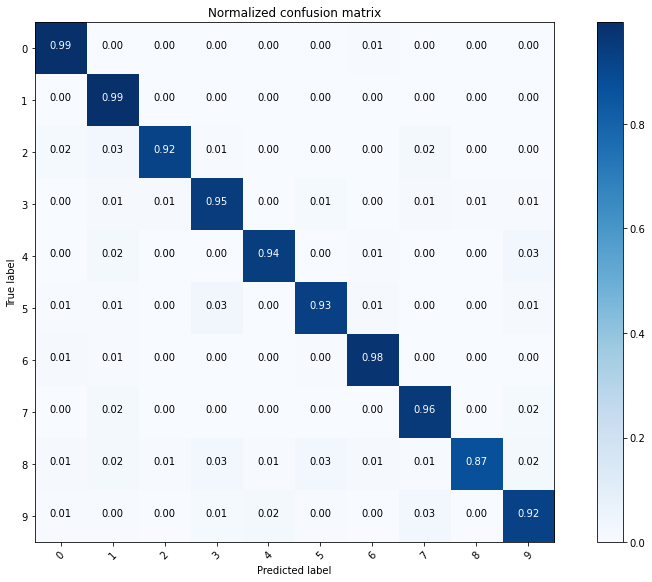

CPU times: user 43min 53s, sys: 2.3 s, total: 43min 55s
Wall time: 22min 21s


In [7]:
%%time
knn = KNNs(n_neighbors=6,p=2,n_jobs=-1)
print('Start training...')
start = time.clock()
knn.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = knn.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start= time.clock()
y_pred = knn.predict(X_test)
predict_times.append(time.clock()-start)
error_knn = zero_one_loss(y_pred, y_test)

print("Erreur: ",error_knn)

print("Classification report for classifier %s:\n%s\n" % (knn, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Start training...
Training time :  148.46743400000014
Test accuracy :  0.9328833333333333
Error:  0.06711666666666671
Classification report for classifier MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(245, 155, 205, 10, 19, 43, 256, 132, 118, 51),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5886
           1       0.98      0.98      0.98      6761
           2       0.93      0.94      0.94      6069
           3       0.94      0.92      0.93      6085
           4    

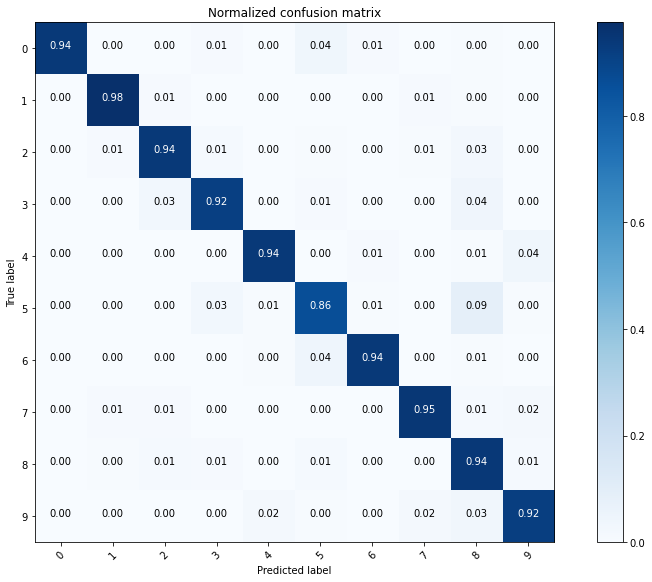

CPU times: user 1min 59s, sys: 40.1 s, total: 2min 39s
Wall time: 1min 21s


In [8]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(245,155,205,10,19,43,256,132,118,51),solver='adam',activation='relu',verbose=0,alpha=1)
print('Start training...')
start = time.clock()
mlp.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = mlp.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start = time.clock()
y_pred = mlp.predict(X_test)
predict_times.append(time.clock()-start)
error_mlp = zero_one_loss(y_pred, y_test)


print("Error: ", error_mlp)
print("Classification report for classifier %s:\n%s\n" % (mlp, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Start training...
Training time :  23.56856800000014
Test accuracy :  0.96145
Error:  0.03854999999999997
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5886
           1       0.98      0.99      0.98      6761
           2       0.96      0.96      0.96      6069
           3       0.95      0.94      0.95      6085
           4       0.96      0.96      0.96      5874
           5       0.95      0.96      0.95      5425
           6       0.97      0.98      0.97      5930
           7       0.96      0.96      0.96      6192
           8       0.96      0.95      0.95      5830
           9       0.95      0.93      0.94      5948

    accuracy

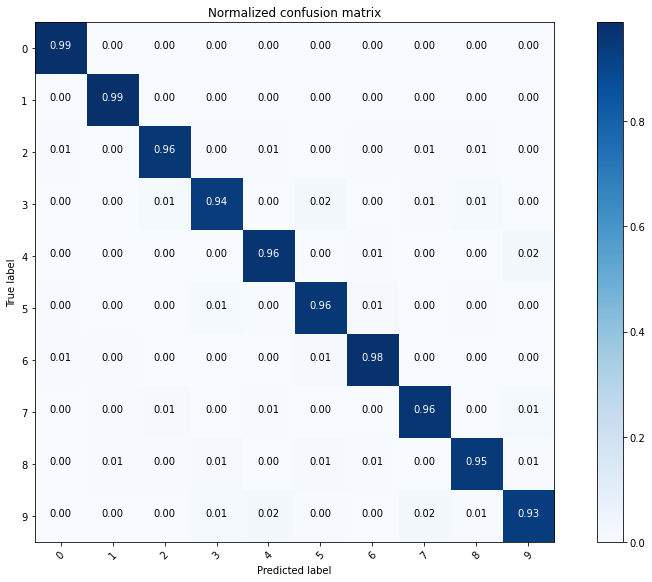

CPU times: user 7min 30s, sys: 190 ms, total: 7min 31s
Wall time: 7min 31s


In [9]:
%%time
svc = SVC(kernel='rbf',C=1)
print('Start training...')
start = time.clock()
svc.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = svc.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start = time.clock()
y_pred = svc.predict(X_test)
predict_times.append(time.clock()-start)
error_svc = zero_one_loss(y_pred, y_test)


print("Error: ", error_svc)
print("Classification report for classifier %s:\n%s\n" % (svc, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

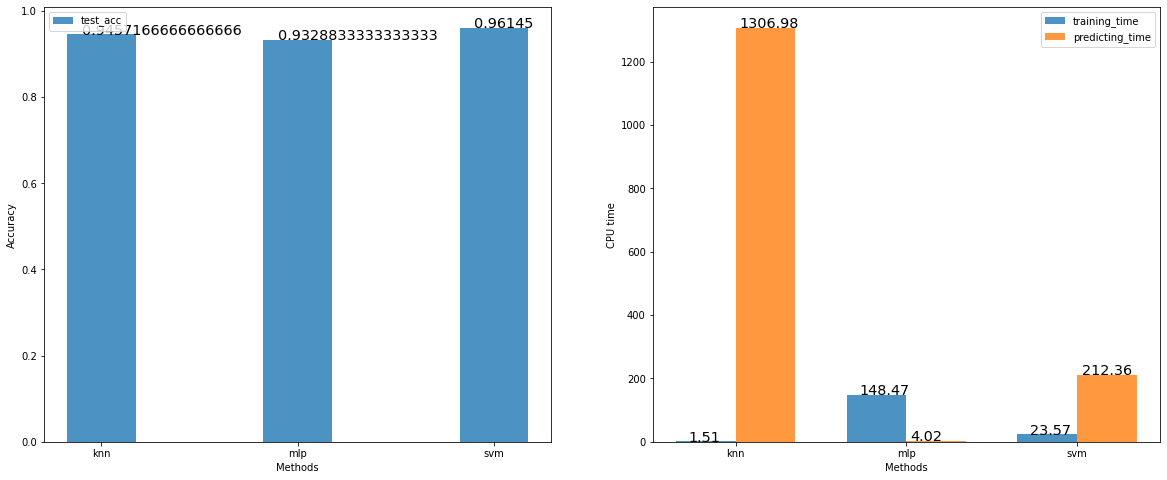

<Figure size 432x288 with 0 Axes>

In [10]:
methods = ('knn', 'mlp', 'svm')
y_pos = np.arange(len(methods))
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(20,8))

plt.subplot(121)
plt.bar(y_pos,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
for i, txt in enumerate(test_scores):
    plt.annotate(txt, (i-0.1, test_scores[i]),fontsize='x-large')
plt.xticks(y_pos,methods)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(122)
plt.bar(y_pos,training_times,bar_width,align='center',alpha=opacity,label='training_time')
plt.bar(y_pos+bar_width,predict_times,bar_width,align='center',alpha=opacity,label='predicting_time')
for i, txt in enumerate(training_times):
    plt.annotate(round(txt,2), (i-0.1, training_times[i]),fontsize='x-large')
for i, txt in enumerate(predict_times):
    plt.annotate(round(txt,2), (i+0.2, predict_times[i]),fontsize='x-large')
plt.xticks(y_pos+bar_width/2,methods)
plt.xlabel('Methods')
plt.ylabel('CPU time')
plt.legend()

plt.show()
plt.savefig("TP3-acc-time.png")

# 3. Précision et temps d'exécution

In [14]:
%%time 
knn_test_scores, knn_training_times = [], []

neighbors_settings = np.array([1,3,10])
for k in neighbors_settings : 
    knn = KNNs(n_neighbors=k,n_jobs=-1)
    start = time.clock()
    knn.fit(X_train,y_train)
    exec_time = time.clock() - start
    knn_training_times.append(exec_time)
    knn_test_scores.append(knn.score(X_test,y_test))

CPU times: user 1h 3min 25s, sys: 2.79 s, total: 1h 3min 28s
Wall time: 32min 15s


In [15]:
%%time 
mlp_test_scores, mlp_training_times = [], []

layers_settings = np.array([1,3,10])
for k in layers_settings: 
    layers = (50,) * k
    mlp = MLPClassifier(hidden_layer_sizes=layers,solver='adam',activation='relu',verbose=0,max_iter=300)
    mlp.fit(X_train,y_train)
    exec_time = time.clock() - start
    mlp_training_times.append(exec_time)
    mlp_test_scores.append(mlp.score(X_test,y_test))

CPU times: user 1min 33s, sys: 41.5 s, total: 2min 14s
Wall time: 1min 8s


In [16]:
%%time 
svm_test_scores, svm_training_times = [], []

kernel_settings = ['precomputed','linear','poly','rbf','sigmoid']
for k in kernel_settings: 
  if (k == 'precomputed'):
    svc = SVC(kernel=k)
    start = time.clock()
    svc.fit(X_train.dot(np.transpose(X_train)),y_train)
    exec_time = time.clock() - start
    svm_training_times.append(exec_time)
    svm_test_scores.append(svc.score(X_test.dot(np.transpose(X_train)),y_test))
  else:
    svc = SVC(kernel=k)
    start = time.clock()
    svc.fit(X_train,y_train)
    exec_time = time.clock() - start
    svm_training_times.append(exec_time)
    svm_test_scores.append(svc.score(X_test,y_test))

CPU times: user 13min 49s, sys: 458 ms, total: 13min 50s
Wall time: 13min 24s


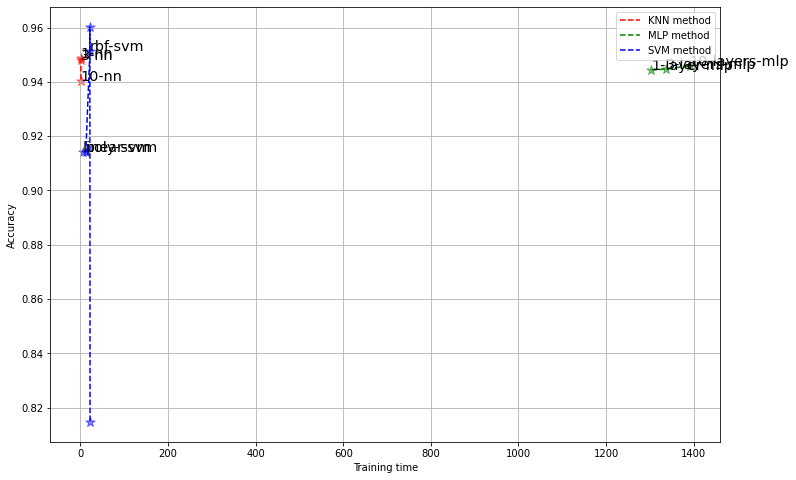

<Figure size 432x288 with 0 Axes>

In [17]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
knn_names = ['linear-svm','poly-svm','rbf-svm']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-3.png")

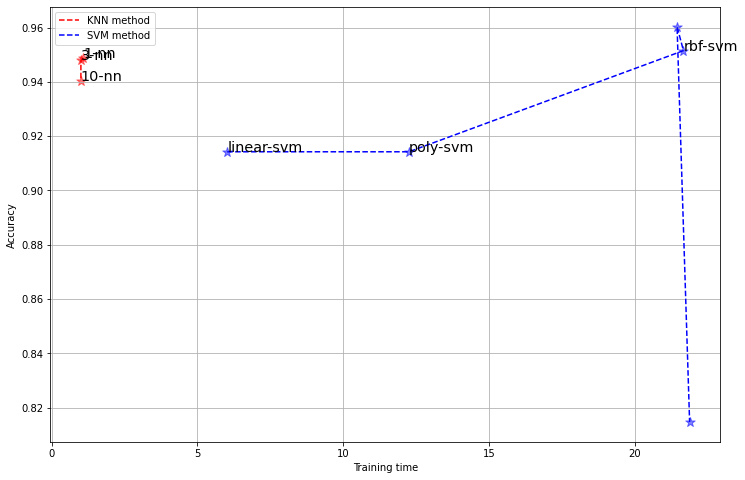

<Figure size 432x288 with 0 Axes>

In [18]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
# plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
# knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
knn_names = ['linear-svm','poly-svm','rbf-svm']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-2.png")

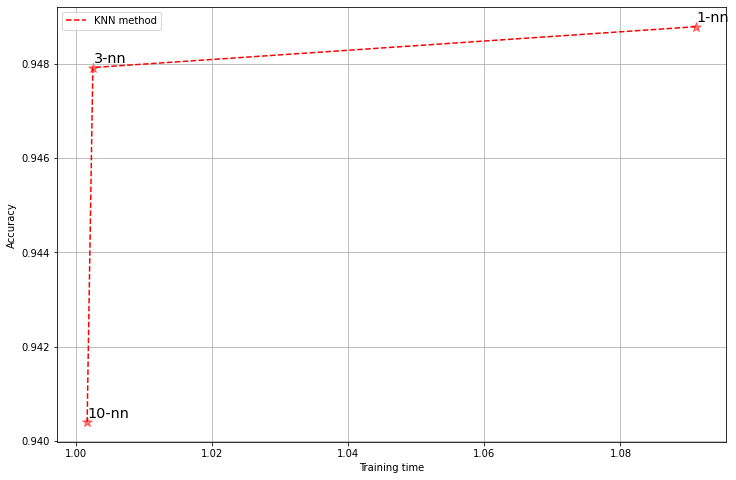

<Figure size 432x288 with 0 Axes>

In [19]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
# plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
# knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
# plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
# knn_names = ['linear-svm','poly-svm','rbf-svm']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-1.png")